# CZ1107 Lab 3: Exploratory Analysis
Dion Toh Siyong U2021674D

###### Importing relavant libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

## Problem 1: Analysis of Numeric Variables

In [2]:
houseData = pd.read_csv("train.csv")

houseNumData = pd.DataFrame(houseData[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']])
houseNumData.shape

(1460, 5)

#### 1a) Check the individual statistical description and visualize the statistical distributions of each of these variables.

Text(0.5, 1.0, 'LotArea')

Text(0.5, 1.0, 'GrLivArea')

Text(0.5, 1.0, 'TotalBsmtSF')

Text(0.5, 1.0, 'GarageArea')

Text(0.5, 1.0, 'SalePrice')

<Figure size 1728x576 with 0 Axes>

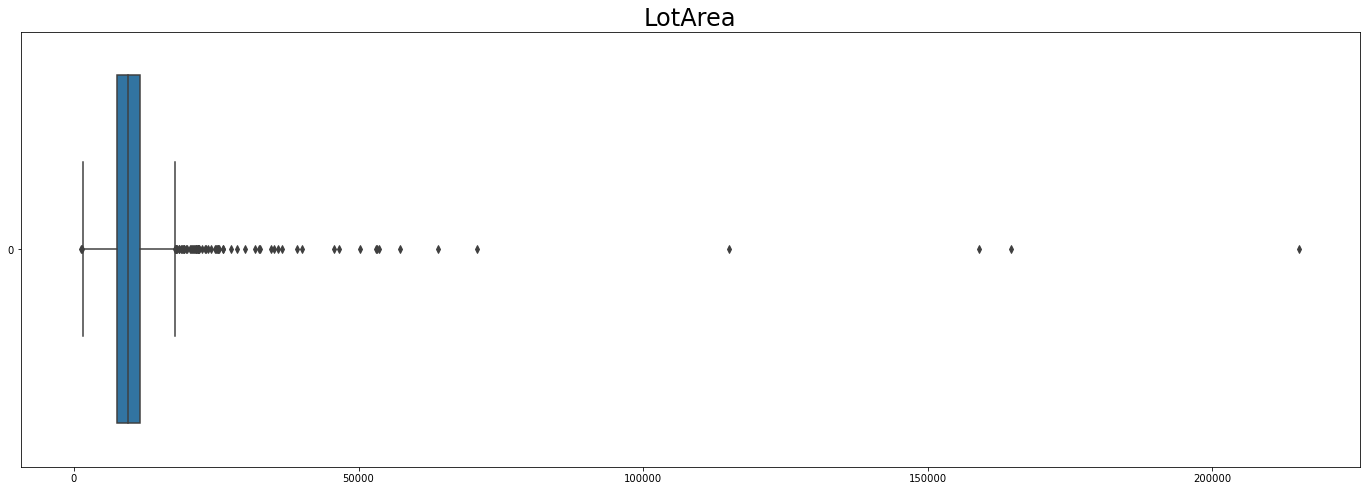

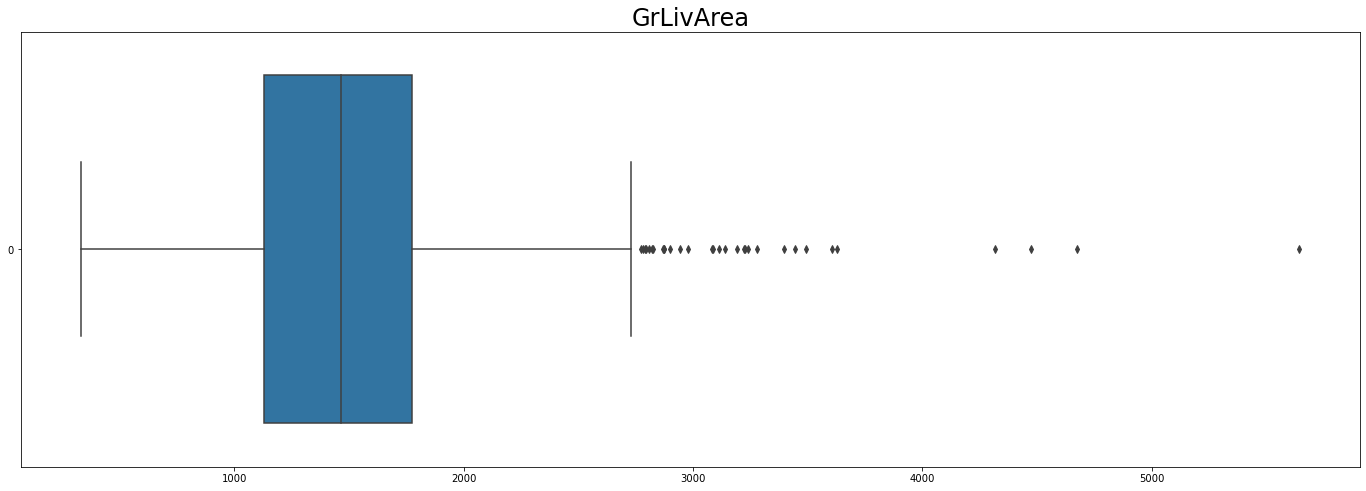

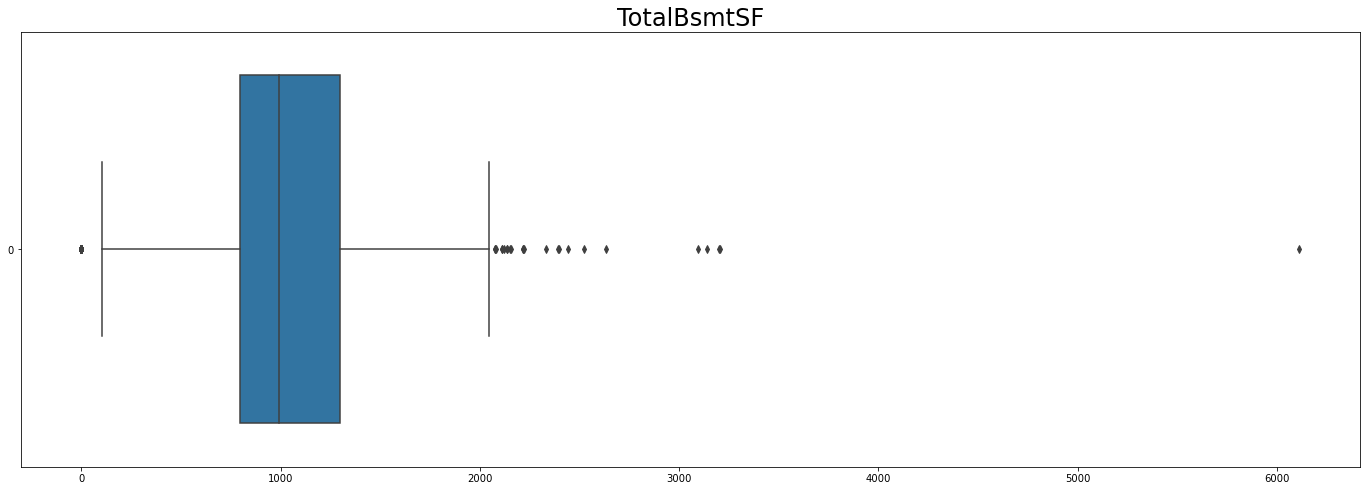

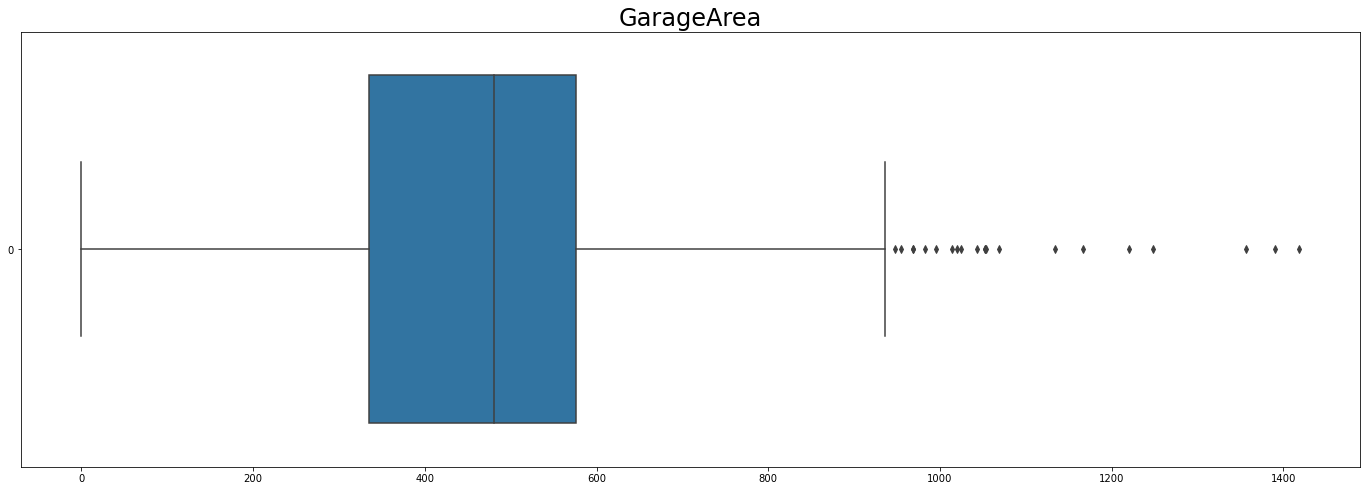

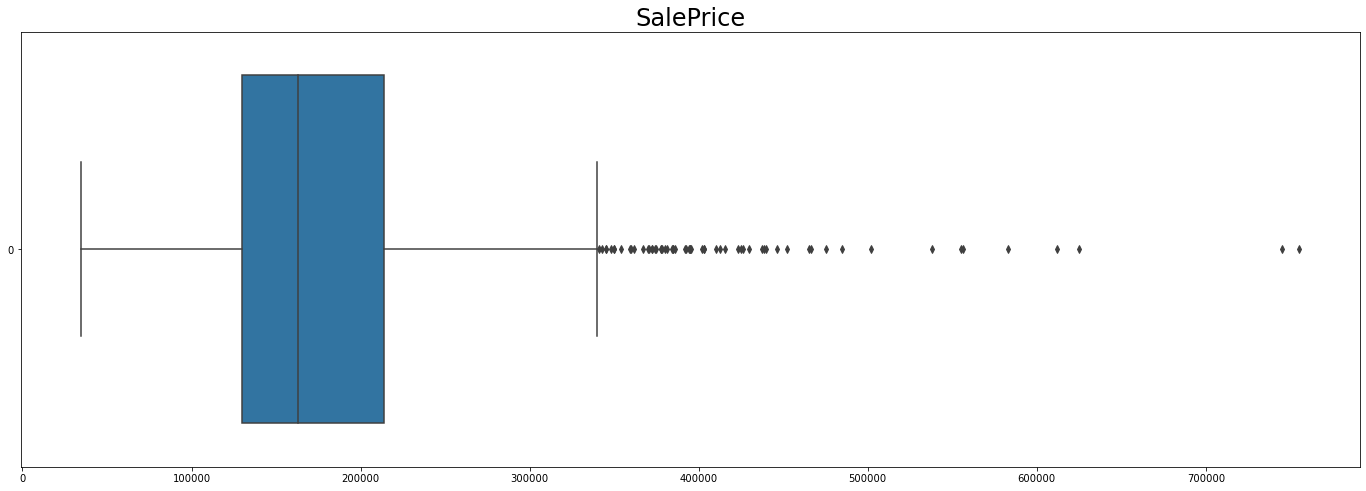

In [3]:
relevantData = ['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']
f = plt.figure(figsize = (24,8))

for i in range(5):
    f = plt.figure(figsize = (24,8))
    display(sb.boxplot(data = houseNumData[relevantData[i]], orient = "h").set_title(relevantData[i], fontsize = 24))

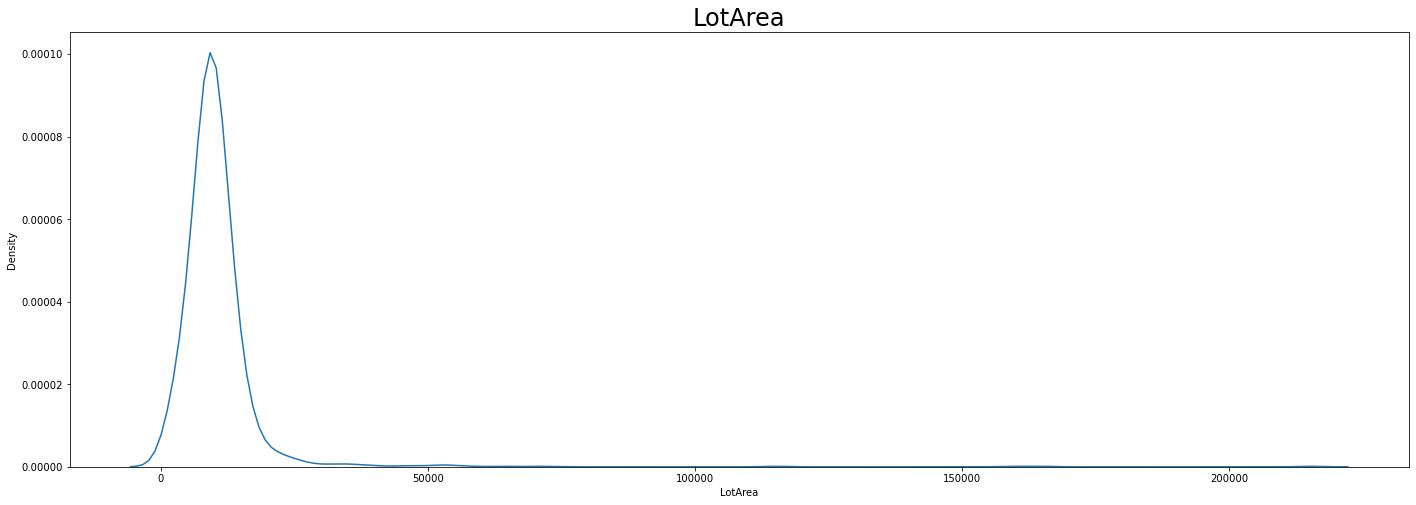

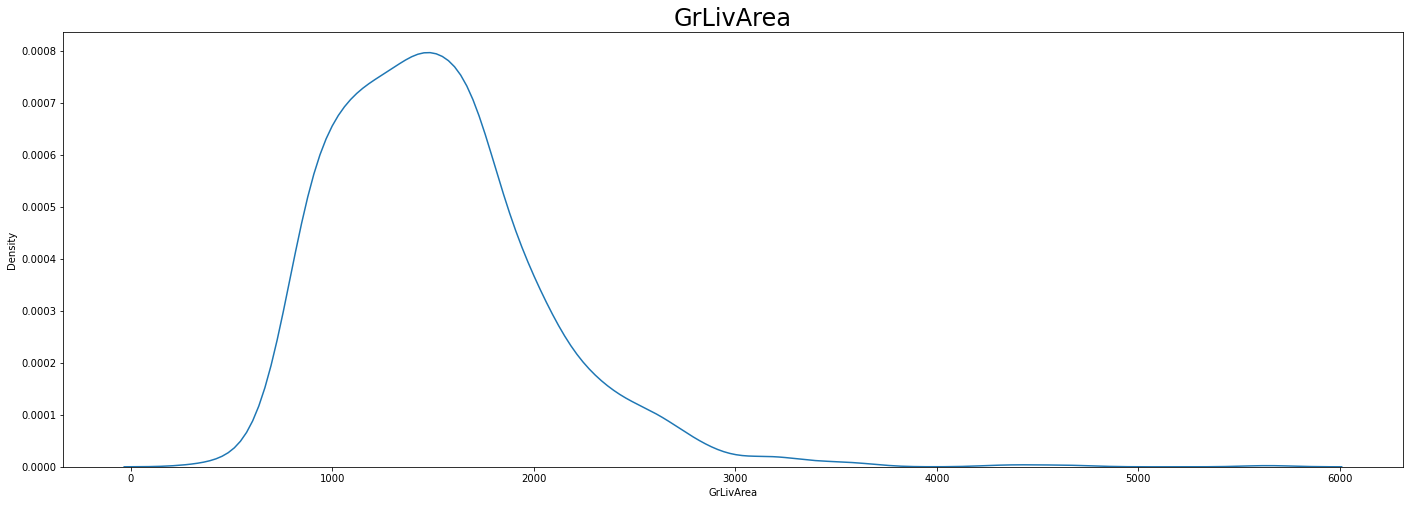

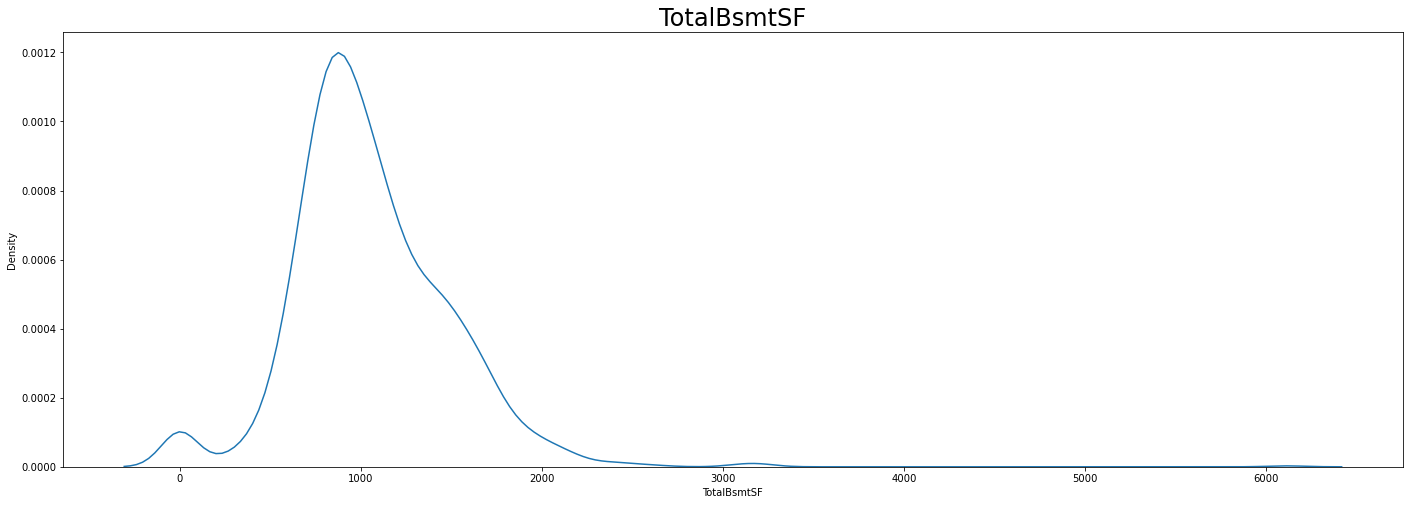

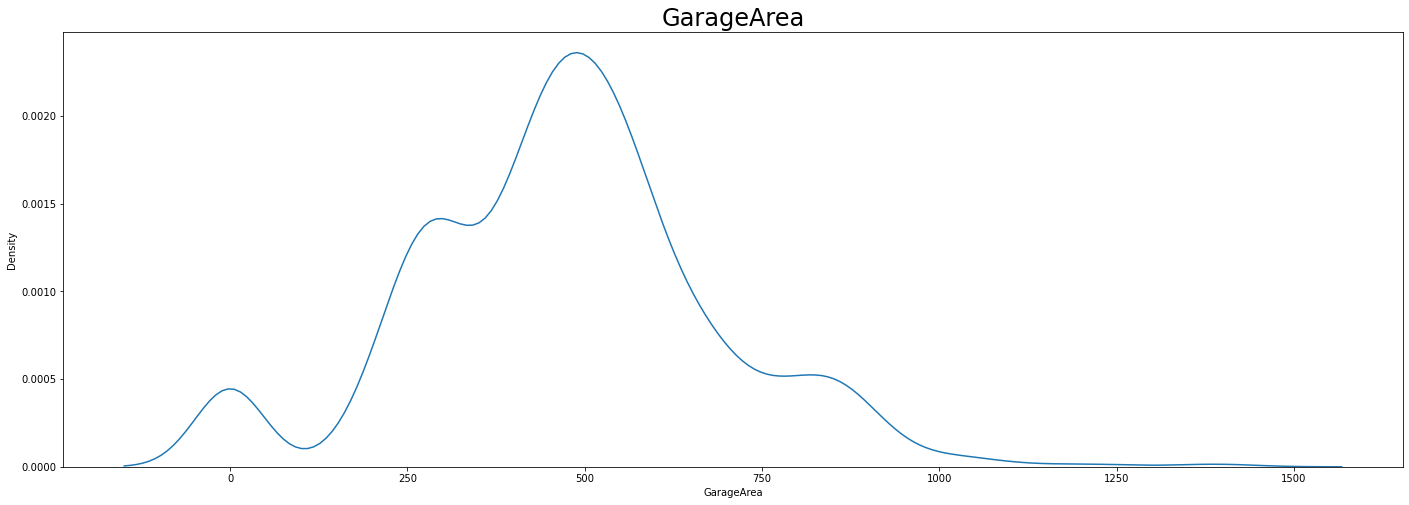

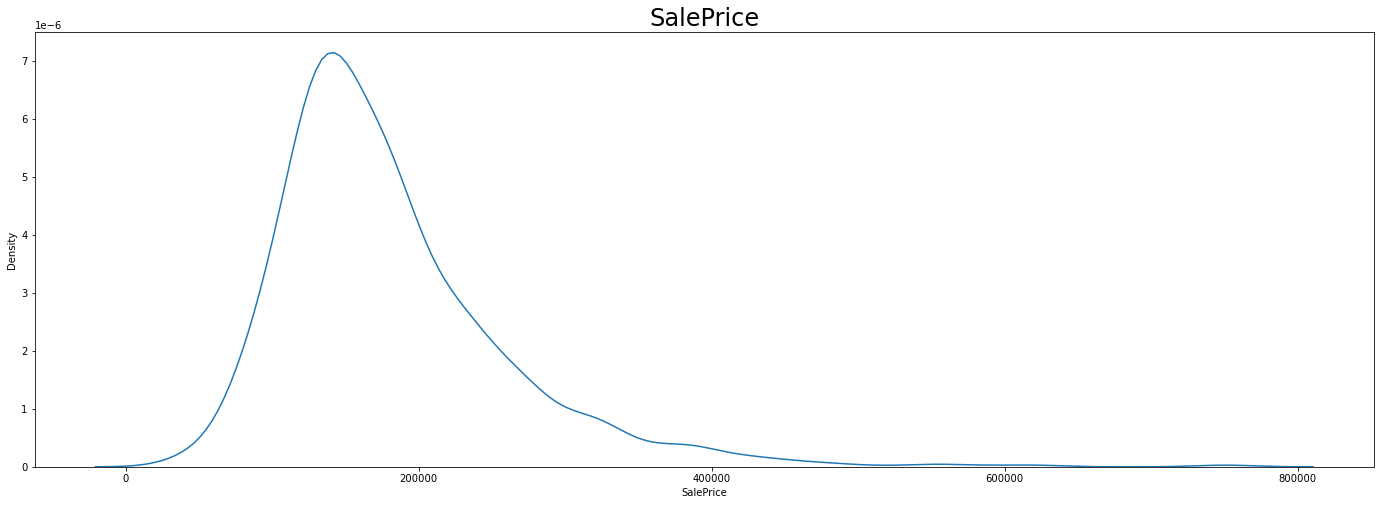

In [4]:
for i in range(5):
    f = plt.figure(figsize = (24,8))
    sb.kdeplot(data = houseNumData[relevantData[i]]).set_title(relevantData[i], fontsize = 24)

In [5]:
houseNumData.describe()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1515.463699,1057.429452,472.980137,180921.195890
std,9981.264932,525.480383,438.705324,213.804841,79442.502883
min,1300.000000,334.000000,0.000000,0.000000,34900.000000
25%,7553.500000,1129.500000,795.750000,334.500000,129975.000000
50%,9478.500000,1464.000000,991.500000,480.000000,163000.000000
75%,11601.500000,1776.750000,1298.250000,576.000000,214000.000000
max,215245.000000,5642.000000,6110.000000,1418.000000,755000.000000


#### b) Comment if the distributions look like “Normal Distribution”, or different. Use the .skew() method to find the “skewness” of each of the five distributions. Which of the variables has the maximum number of outliers?

###### Based on the KDE and Boxplots:

LotArea has a distribution that looks like a Normal Distribution, however it has many outliers, and the outliers have a big range of values.

GrLivArea's distribution is different to that of a Normal Distribution, it has many outliers, spanning a larger range of values.

TotalBsmtSF's distribution is different to that of a Normal Distribution, not as many outliers as compared to LotArea and GrLivArea, however outliers have a big range of values. The visuals show that it is slightly skewed to the left.

GarageArea's distribution is different to that of a Normal Distribution, not as many outliers, and the range of outliers is smaller than that of TotalBsmtSF. The visuals show that it is skewed to the right.

SalePrice's distribution is similar to that of a Normal Distribution, it has many outliers, which have quite a big range. The visuals show that it is skewed to the left.

In [6]:
houseNumData.skew()

LotArea        12.207688
GrLivArea       1.366560
TotalBsmtSF     1.524255
GarageArea      0.179981
SalePrice       1.882876
dtype: float64

In [7]:
houseNumData["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [8]:
np.percentile(houseNumData["SalePrice"], 75)

214000.0

In [9]:
#Counting the number of outliers
for i in range(5):
    mean = data[relevantData[i]].mean()
    #min = data[relevantData[i]].min()
    q3 = np.percentile(data[relevantData[i]], 75)
    q1 = np.percentile(data[relevantData[i]], 25)
    gap = 1.5 * (q3 - q1)
    highest = q3 + gap
    lowest = q1 - gap
    count = 0
    for j in range(1460):
        if data[relevantData[i]][j] > highest or data[relevantData[i]][j] < lowest:
            count += 1
    print(relevantData[i], "has", count, "outliers")

LotArea has 216 outliers
GrLivArea has 144 outliers
TotalBsmtSF has 115 outliers
GarageArea has 165 outliers
SalePrice has 183 outliers


###### LotArea has the most number of outliers.

#### c) Check the relationship amongst the variables using mutual correlation and the correlation heatmap. Comment which of the variables has the strongest correlation with “SalePrice”. Is this useful in predicting “SalePrice”?

<AxesSubplot:>

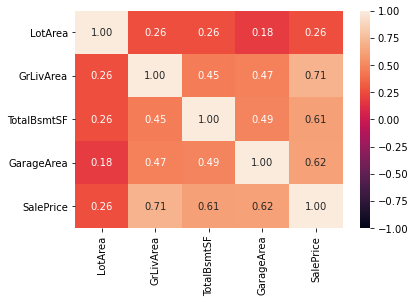

In [10]:
sb.heatmap(houseNumData.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

#### d) Check the relationship amongst the variables using mutual jointplots and an overall pairplot. Comment which of the variables has the strongest linear relation with “SalePrice”. Is this useful in predicting “SalePrice”?

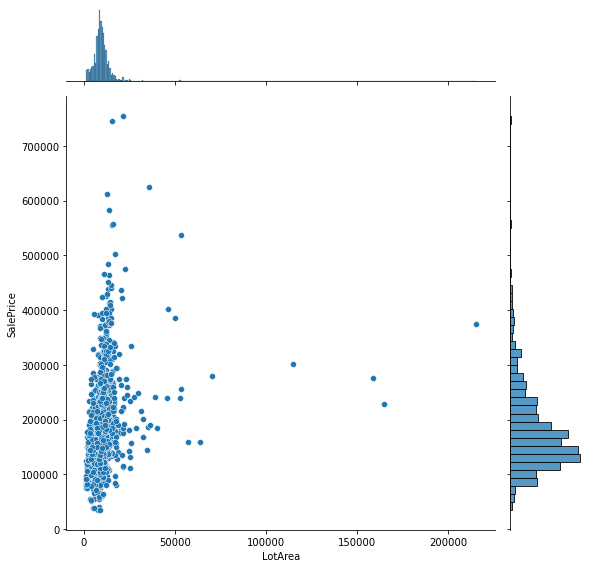

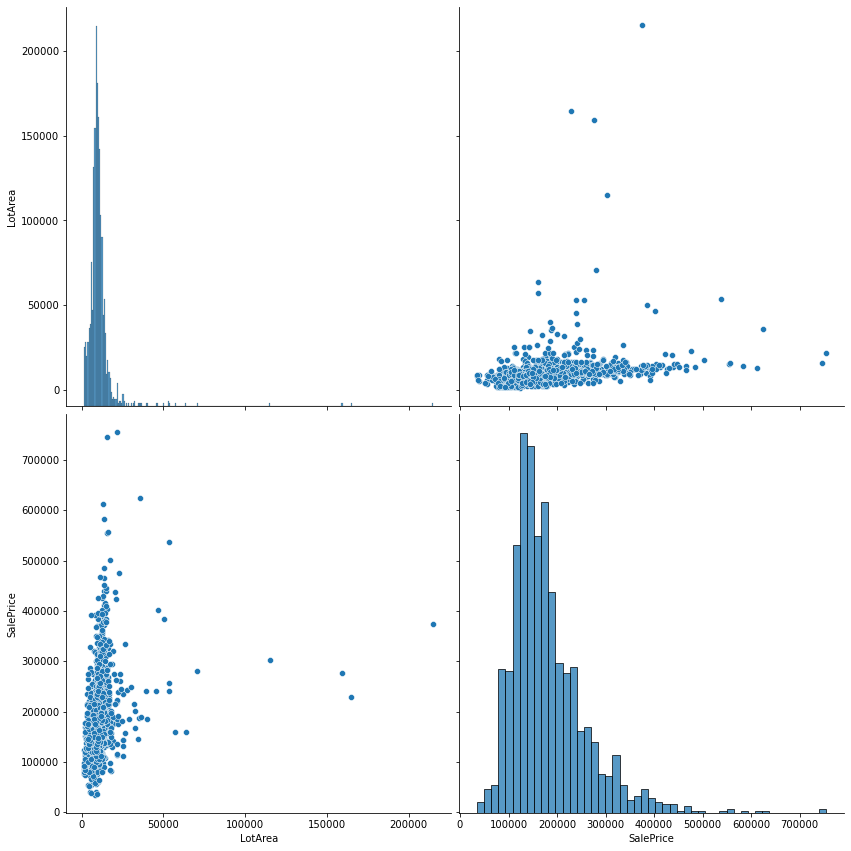

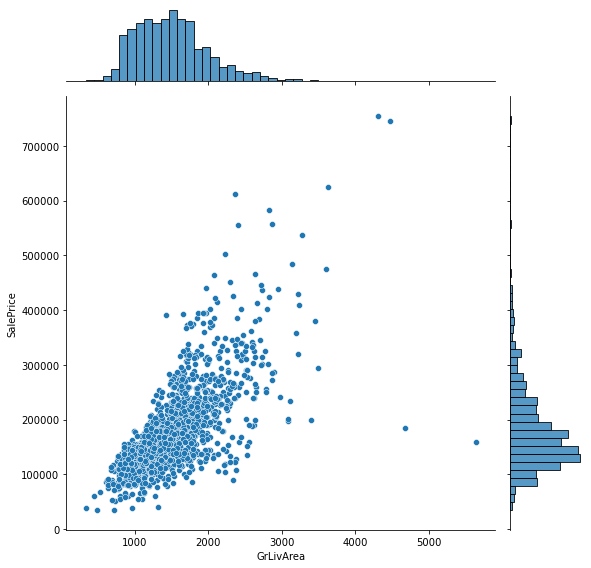

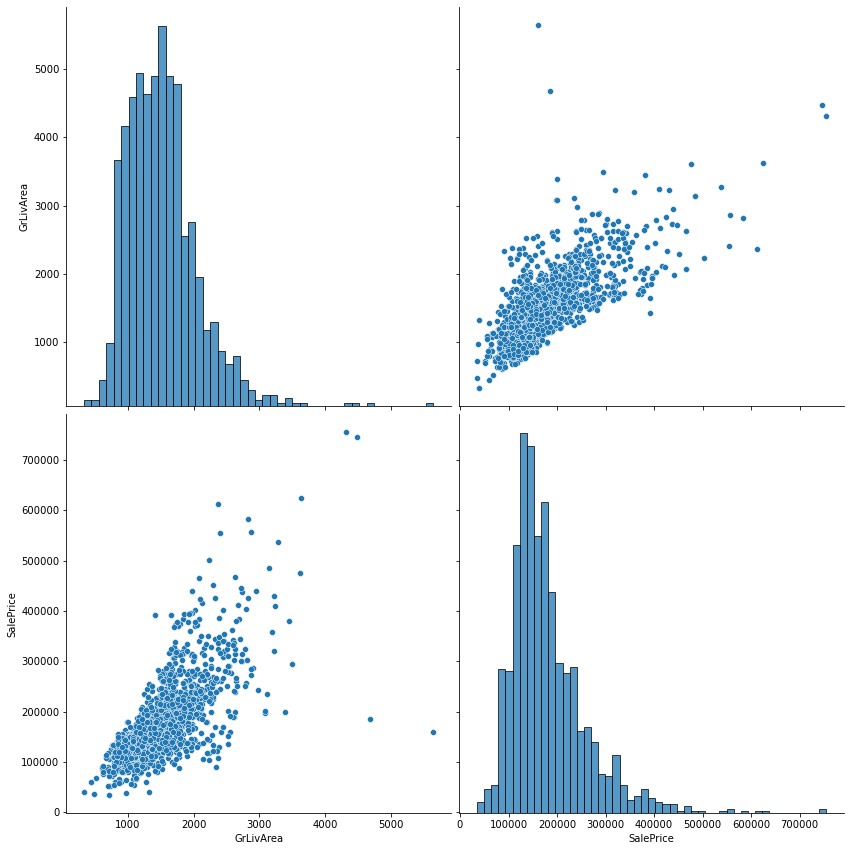

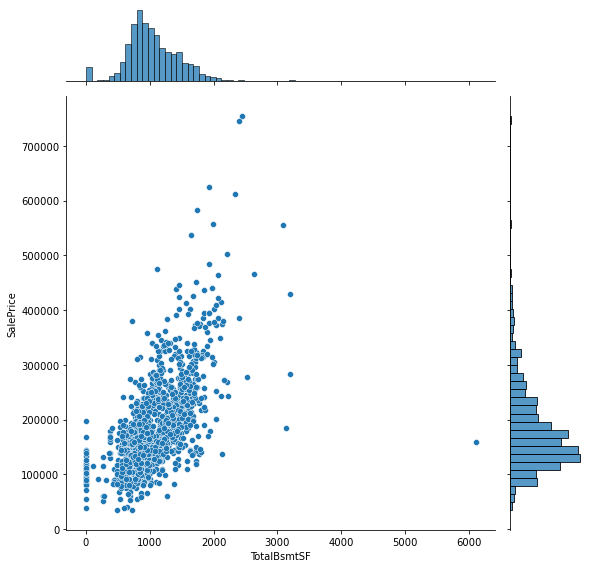

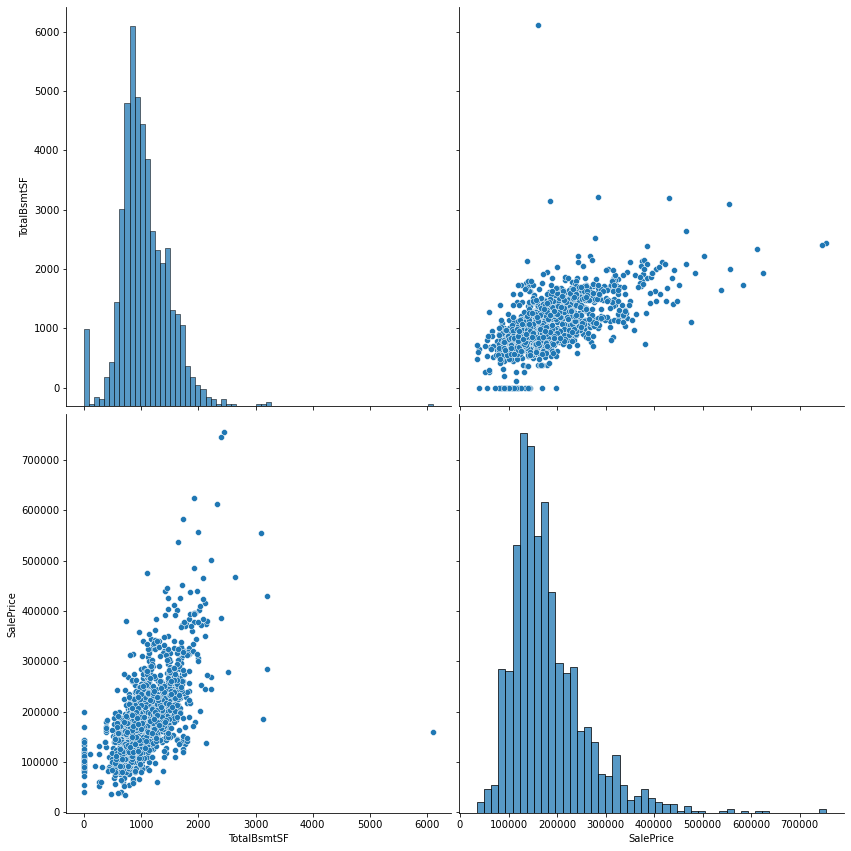

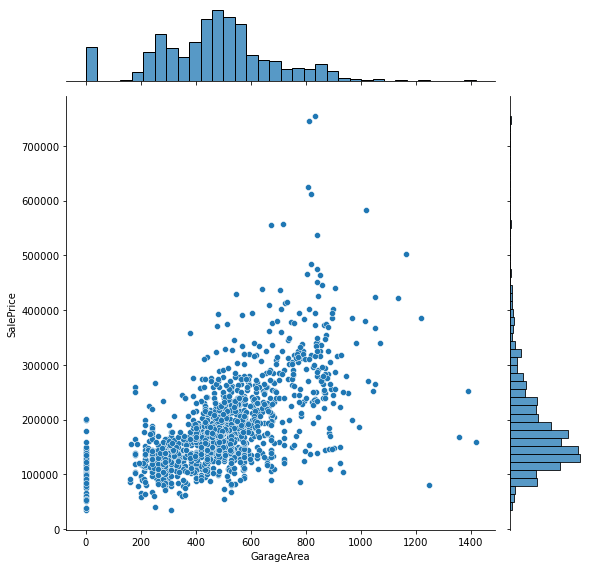

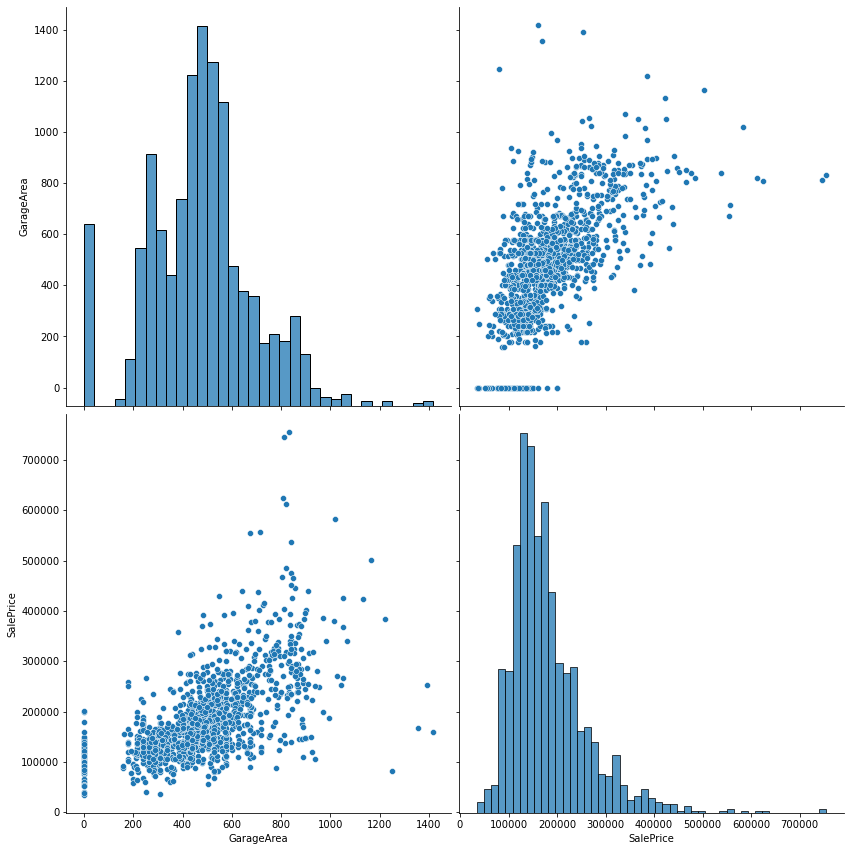

In [11]:
for i in range(4):
    tempDF = pd.concat([houseNumData[relevantData[i]], houseNumData["SalePrice"]], axis = 1)
    sb.jointplot(data = tempDF, x = relevantData[i], y = "SalePrice", height = 8)
    sb.pairplot(data = tempDF, height = 6)

From the above graphs, it seems like GrLivArea has the highest correlation with SalePrice.

## Problem 2: Analysis of Categorical Variables

In [12]:
houseCatData = pd.DataFrame(houseData[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']], dtype = "c")

#### a) Convert each of these variables into “category” data type (note that some are “int64”, and some are “object”).

In [13]:
houseCatData = houseCatData.astype("category")

#### b) Check the individual statistical description and visualize the distributions (catplot) of each of these variables.

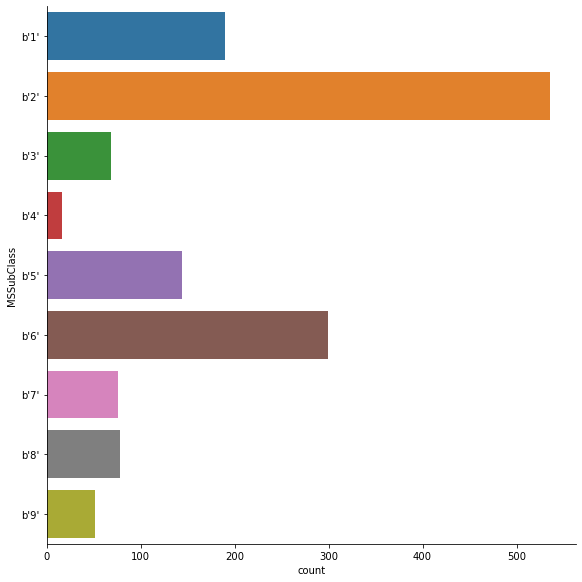

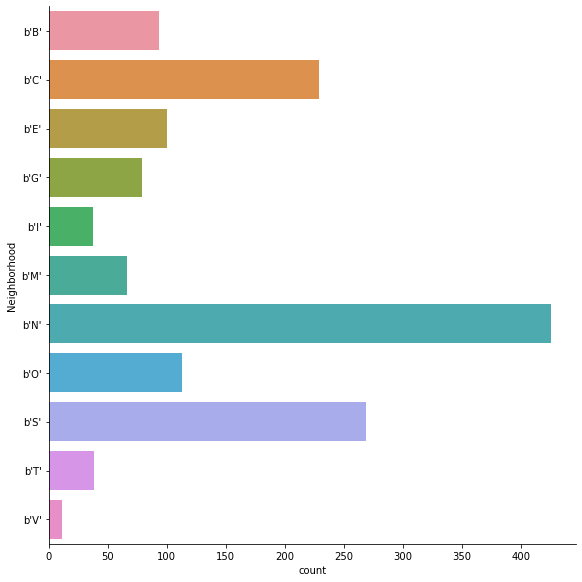

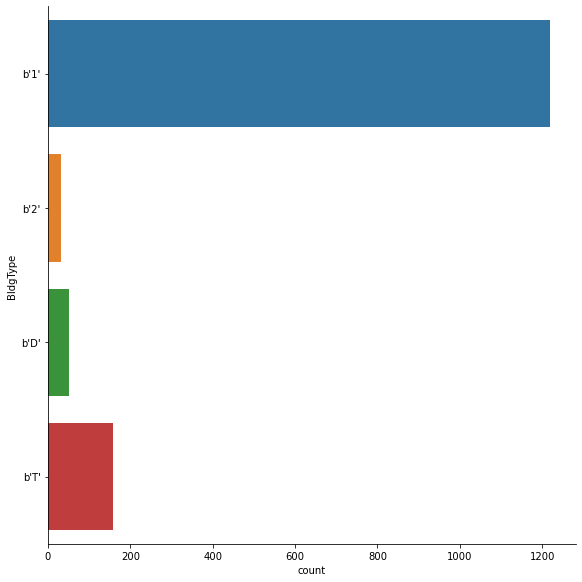

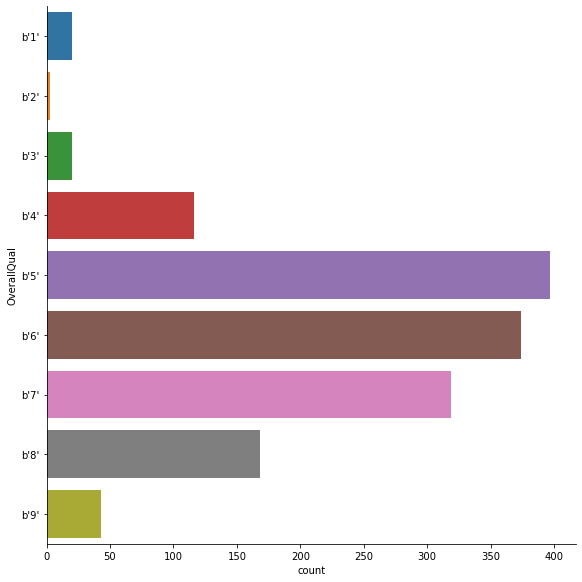

In [19]:
for i in range(4):
    sb.catplot(y = houseCatData.columns.values[i], data = houseCatData, kind = "count", height = 8)

#### c) One may check the relation amongst two categorical variables through the bi-variate joint heatmap of counts. Use groupby() command to generate joint heatmap of counts for “OverallQual” against the other three variables. Comment if this is useful in identifying the relation between “OverallQual” with the other variables. 

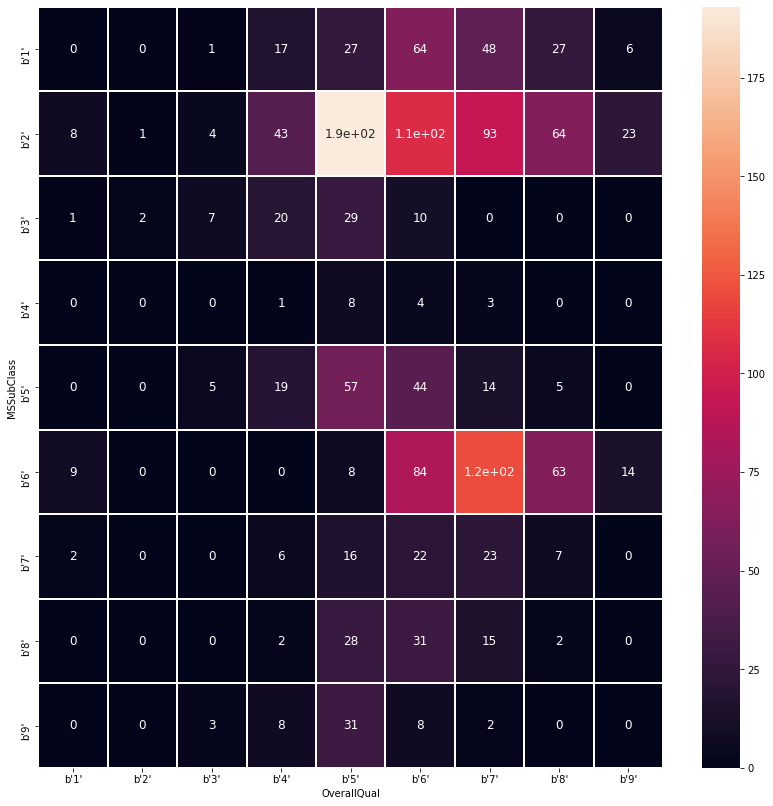

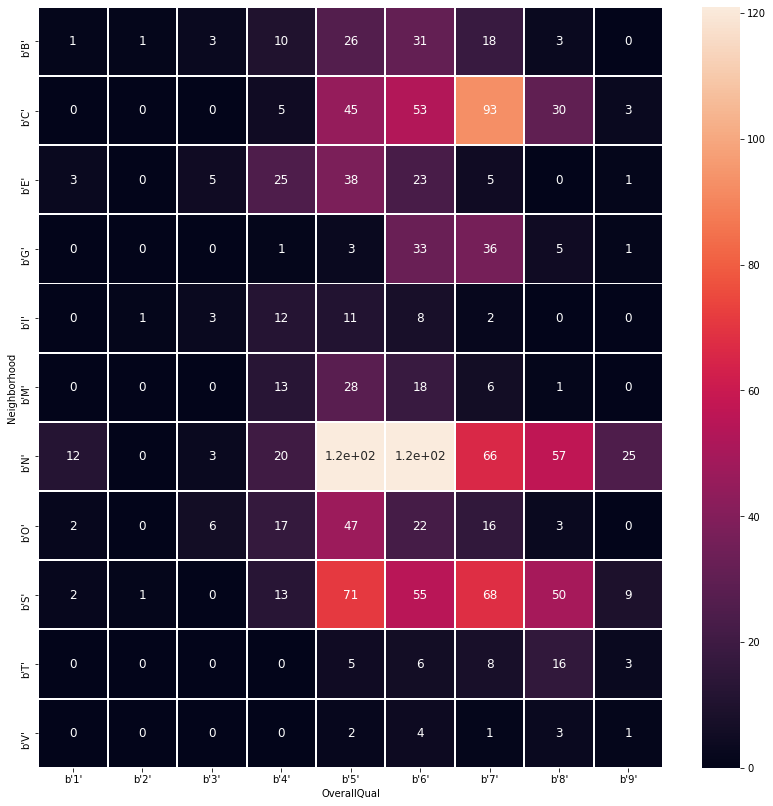

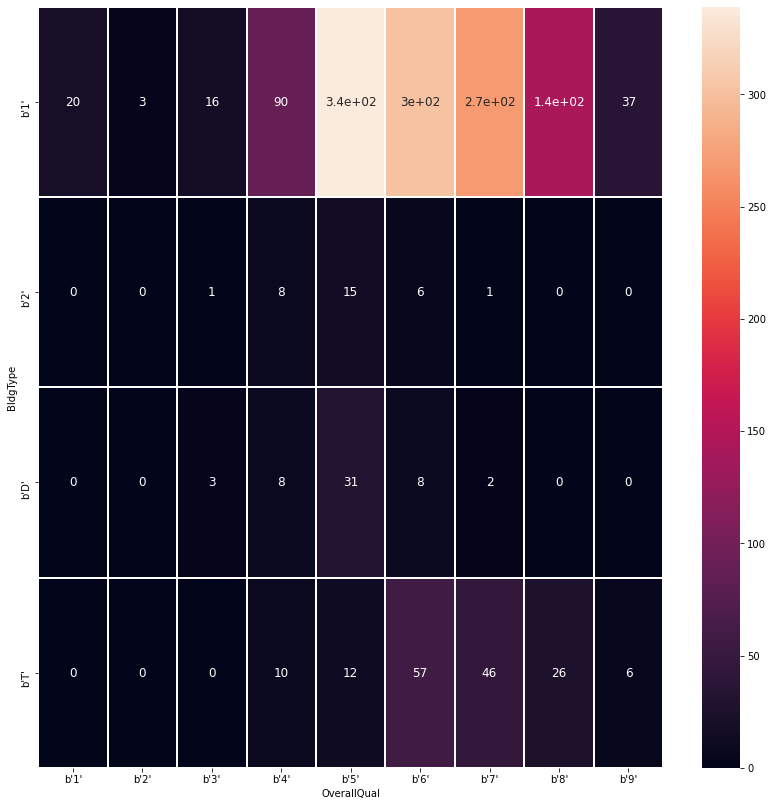

In [15]:
for i in range(3):
    f = plt.figure(figsize=(14, 14))
    sb.heatmap(houseCatData.groupby([houseCatData.columns.values[i], "OverallQual"]).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 12})
    plt.show()

Based on the heatmap plots, I personally feel that these plots are useful only to a certain extent. 

#### d) Draw boxplots of “SalePrice” against each of these categorical variables. Notice the patterns in these boxplots. Comment on which of these variables has the most influence in predicting “SalePrice”.


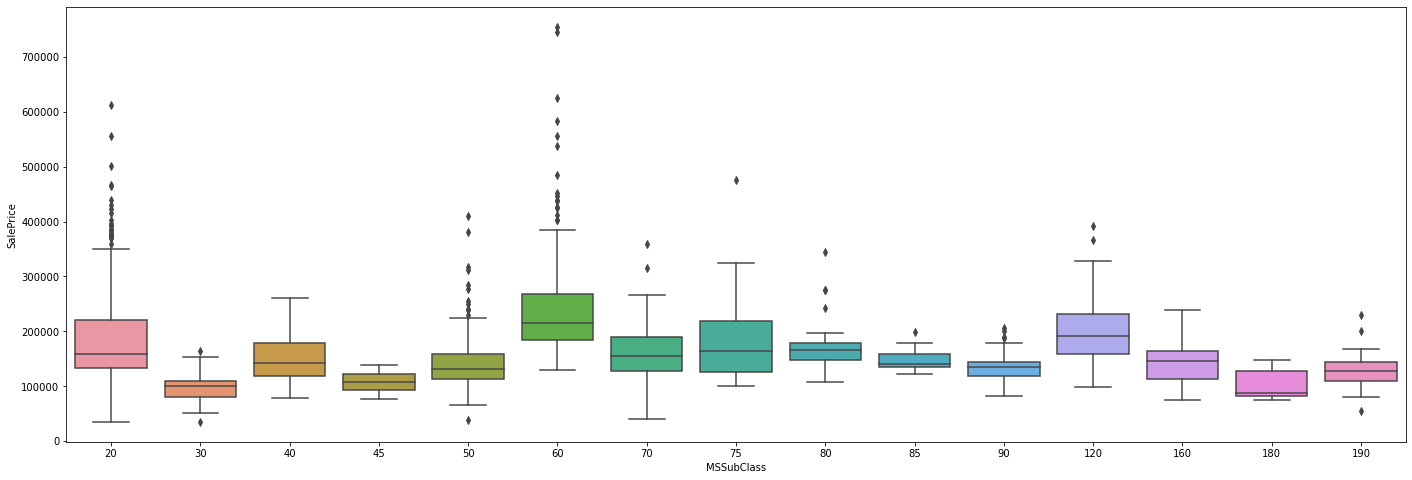

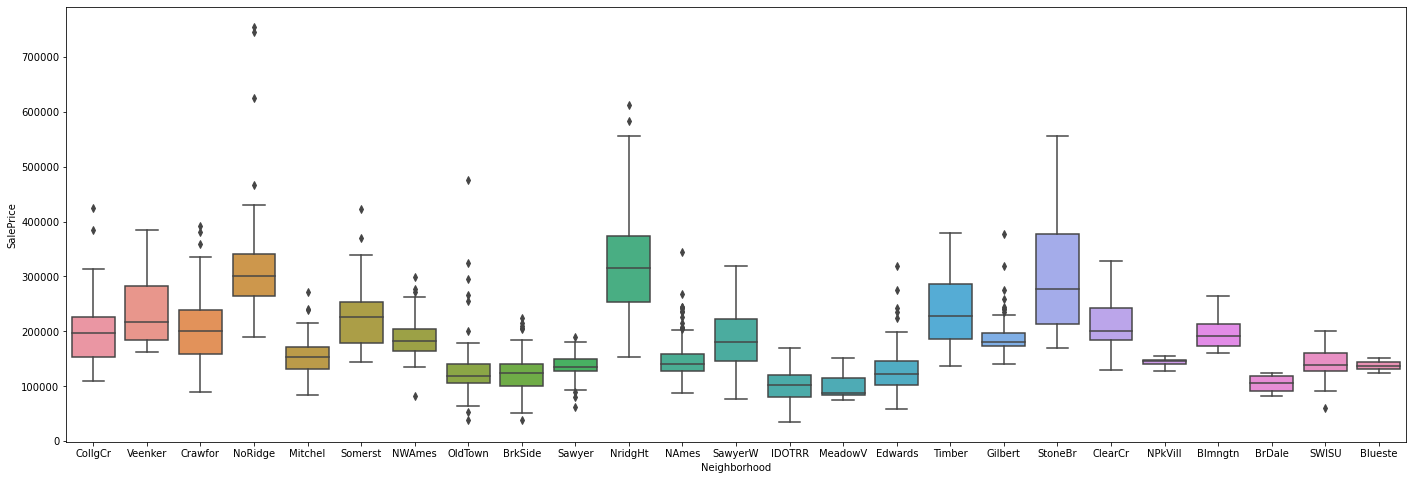

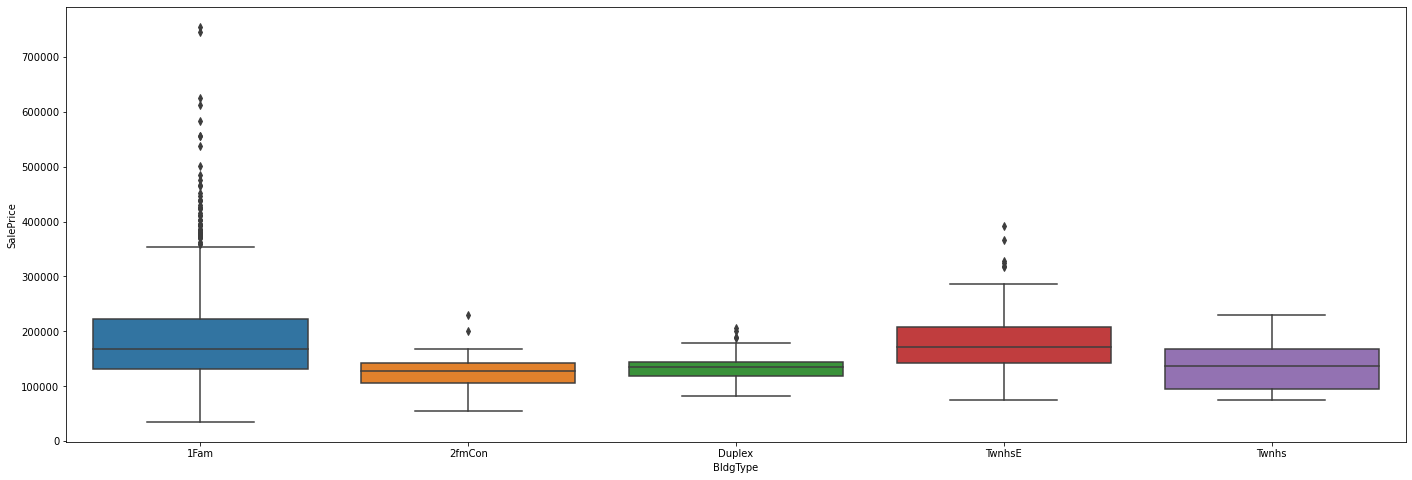

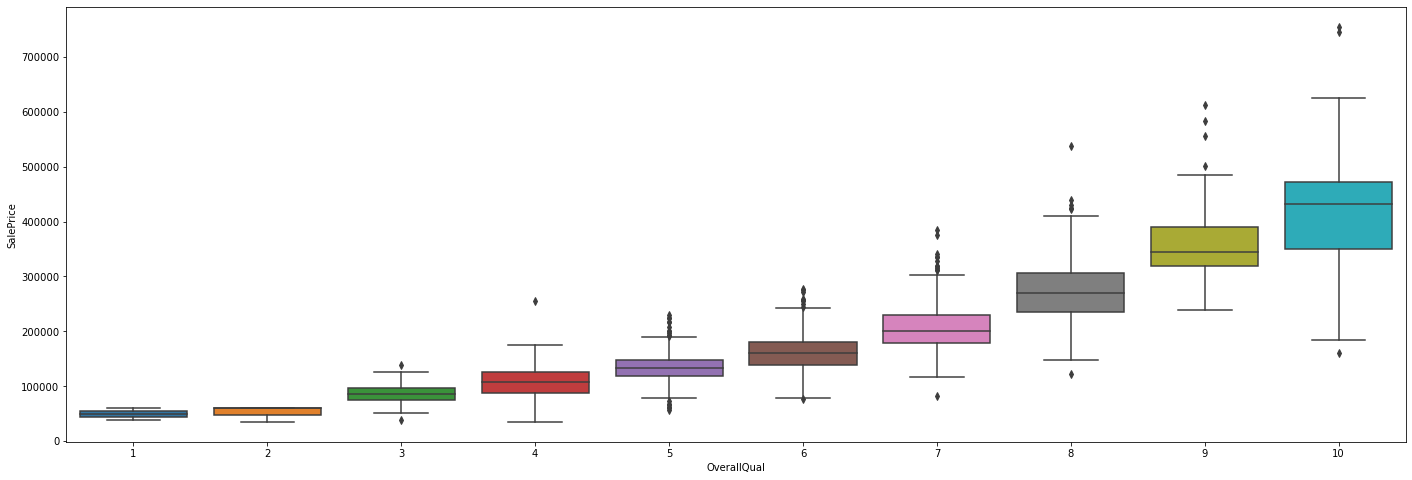

In [29]:
for i in range(4):
    f = plt.figure(figsize = (24,8))
    sb.boxplot(x = houseCatData.columns.values[i], y = 'SalePrice', data = houseData)